In [2]:
from inltk.inltk import tokenize
text = 'तुम्हारा नाम क्या हे'
tokenize(text, 'hi')

['▁तुम्हारा', '▁नाम', '▁क्या', '▁हे']

In [4]:
import requests
import json
data = {
    'text_to_translate': '',
    'source_lang': 'en',
    'translated_lang': 'hi',
    'use_cache_only': 'false'}
def translate(text):
    if isinstance(text, list):
        return list(map(lambda x: translate(x), text))
    else:
        data['text_to_translate'] = text
        return json.loads(requests.post('https://www.translate.com/translator/ajax_translate', data=data).text)['translated_text']

# return json.loads(requests.get(f'https://translate.googleapis.com/translate_a/single?client=gtx&sl=en&tl=hi&dt=t&q={text}').text)[0][0][0]

In [ ]:
result = translate(input())
print(result)
pyperclip.copy(result)

In [9]:
import pandas as pd
df = pd.read_json('./intent.json')
df.head()

,intent,text,responses,extension,context,entityType,entities
0,Greeting,"[Hi, Hi there, Hola, Hello, Hello there, Hya, ...","[Hi human, please tell me your GeniSys user, H...","{'function': '', 'entities': False, 'responses...","{'in': '', 'out': 'GreetingUserRequest', 'clea...",NA,[]
1,GreetingResponse,"[My user is Adam, This is Adam, I am Adam, It ...","[Great! Hi <HUMAN>! How can I help?, Good! Hi ...","{'function': 'extensions.gHumans.updateHuman',...","{'in': 'GreetingUserRequest', 'out': '', 'clea...",NA,"[{'entity': 'HUMAN', 'rangeFrom': 3, 'rangeTo'..."
2,CourtesyGreeting,"[How are you?, Hi how are you?, Hello how are ...","[Hello, I am great, how are you? Please tell m...","{'function': '', 'entities': False, 'responses...","{'in': '', 'out': 'CourtesyGreetingUserRequest...",NA,[]
3,CourtesyGreetingResponse,"[Good thanks! My user is Adam, Good thanks! Th...","[Great! Hi <HUMAN>! How can I help?, Good! Hi ...","{'function': 'extensions.gHumans.updateHuman',...","{'in': 'GreetingUserRequest', 'out': '', 'clea...",NA,"[{'entity': 'HUMAN', 'rangeFrom': 5, 'rangeTo'..."
4,CurrentHumanQuery,"[What is my name?, What do you call me?, Who d...","[You are <HUMAN>! How can I help?, Your name i...",{'function': 'extensions.gHumans.getCurrentHum...,"{'in': '', 'out': 'CurrentHumanQuery', 'clear'...",NA,[]


In [10]:
import re
def camel_case_split(str):
    return ' '.join(re.findall(r'[A-Z](?:[a-z]+|[A-Z]*(?=[A-Z]|$))', str))

In [12]:
df['intent'] = df['intent'].apply(camel_case_split)
df['intent'] = df['intent'].apply(translate)
df['text'] = df['text'].apply(translate)
df.head()

,intent,text,responses,extension,context,entityType,entities
0,शुभकामना,"[नमस्ते, आपको नमस्कार, हैलो, नमस्कार,, आपको नम...","[Hi human, please tell me your GeniSys user, H...","{'function': '', 'entities': False, 'responses...","{'in': '', 'out': 'GreetingUserRequest', 'clea...",NA,[]
1,ग्रीटिंग रिस्पांस,"[मेरा उपयोगकर्ता एडम है, यह एडम है, मैं एडम हू...","[Great! Hi <HUMAN>! How can I help?, Good! Hi ...","{'function': 'extensions.gHumans.updateHuman',...","{'in': 'GreetingUserRequest', 'out': '', 'clea...",NA,"[{'entity': 'HUMAN', 'rangeFrom': 3, 'rangeTo'..."
2,सौजन्य अभिवादन,"[How are you?, नमस्ते क्या हालचाल है?, नमस्कार...","[Hello, I am great, how are you? Please tell m...","{'function': '', 'entities': False, 'responses...","{'in': '', 'out': 'CourtesyGreetingUserRequest...",NA,[]
3,सौजन्य ग्रीटिंग रिस्पांस,"[अच्छा धन्यवाद! मेरा उपयोगकर्ता एडम है, अच्छा ...","[Great! Hi <HUMAN>! How can I help?, Good! Hi ...","{'function': 'extensions.gHumans.updateHuman',...","{'in': 'GreetingUserRequest', 'out': '', 'clea...",NA,"[{'entity': 'HUMAN', 'rangeFrom': 5, 'rangeTo'..."
4,वर्तमान मानव क्वेरी,"[मेरा नाम क्या है?, आप मुझे क्या कहते हैं?, आप...","[You are <HUMAN>! How can I help?, Your name i...",{'function': 'extensions.gHumans.getCurrentHum...,"{'in': '', 'out': 'CurrentHumanQuery', 'clear'...",NA,[]


In [14]:
intent = []
for field in df.values:
    for text in field[1]:
        intent.append({'intent':field[0], 'caption':text})
data = pd.DataFrame(intent)
data

,intent,caption
0,शुभकामना,नमस्ते
1,शुभकामना,आपको नमस्कार
2,शुभकामना,हैलो
3,शुभकामना,"नमस्कार,"
4,शुभकामना,आपको नमस्कार
...,...,...
138,आत्म जागरूक,आप साबित कर सकते हैं आप एक सचेत है
139,आत्म जागरूक,आप साबित कर सकते है आप स्वयं कर रहे है कृपया पता
140,आत्म जागरूक,आप साबित कर सकते हैं आप स्वयं को पता कर रहे है...
141,आत्म जागरूक,आप साबित कर सकते हैं आप एक सचेत कृपया है


In [89]:
data

,intent,caption
0,शुभकामना,नमस्ते
1,शुभकामना,आपको नमस्कार
2,शुभकामना,हैलो
3,शुभकामना,"नमस्कार,"
4,शुभकामना,आपको नमस्कार
...,...,...
138,आत्म जागरूक,आप साबित कर सकते हैं आप एक सचेत है
139,आत्म जागरूक,आप साबित कर सकते है आप स्वयं कर रहे है कृपया पता
140,आत्म जागरूक,आप साबित कर सकते हैं आप स्वयं को पता कर रहे है...
141,आत्म जागरूक,आप साबित कर सकते हैं आप एक सचेत कृपया है


In [15]:
%%capture
from inltk.inltk import get_sentence_encoding
X = []
for sent in data['caption']:
    X.append(get_sentence_encoding(sent,'hi'))

In [16]:
import numpy as np
X = np.array(X)
X.shape

(143, 400)

In [33]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
le = LabelEncoder()
intents = le.fit_transform(data['intent'])
intents = intents.reshape(-1,1)
intents = ohe.fit_transform(intents).toarray()
intents.shape

(143, 22)

In [90]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_Y, test_Y = train_test_split(X, intents, test_size = 0.3)
train_X = train_X.reshape(len(train_X), 1, train_X.shape[1])
test_X = test_X.reshape(len(test_X), 1, test_X.shape[1])
print(train_X.shape, train_Y.shape)
print(test_X.shape, test_Y.shape)

(100, 1, 400) (100, 22)
(43, 1, 400) (43, 22)


In [91]:
from keras.models import Sequential, load_model
from keras.layers import Dense, LSTM, Bidirectional, Dropout
model = Sequential()
model.add(Bidirectional(LSTM(256), input_shape=(train_X.shape[1:])))
model.add(Dropout(0.6))
model.add(Dense(intents.shape[1], activation = "softmax"))
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_16 (Bidirectio (None, 512)               1345536   
_________________________________________________________________
dropout_16 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 22)                11286     
Total params: 1,356,822
Trainable params: 1,356,822
Non-trainable params: 0
_________________________________________________________________


In [92]:
from keras.callbacks import EarlyStopping 
from keras.callbacks import ModelCheckpoint
filepath = "weights.best.hdf5"
cp_callback = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
es_callback = EarlyStopping(monitor='val_loss', patience=5)
history = model.fit(train_X, train_Y,
                    epochs=100, 
                    validation_data=(test_X, test_Y), 
                    batch_size=11,
                    callbacks=[es_callback,cp_callback])

Epoch 1/100
 6/10 [=================>............] - ETA: 0s - loss: 3.0502 - accuracy: 0.1061    
Epoch 00001: val_accuracy improved from -inf to 0.34884, saving model to weights.best.hdf5
10/10 [==============================] - 1s 120ms/step - loss: 3.0413 - accuracy: 0.1000 - val_loss: 2.9417 - val_accuracy: 0.3488
Epoch 2/100
 6/10 [=================>............] - ETA: 0s - loss: 2.8369 - accuracy: 0.4697
Epoch 00002: val_accuracy did not improve from 0.34884
10/10 [==============================] - 0s 13ms/step - loss: 2.8105 - accuracy: 0.4700 - val_loss: 2.8235 - val_accuracy: 0.3023
Epoch 3/100
10/10 [==============================] - ETA: 0s - loss: 2.6055 - accuracy: 0.5500
Epoch 00003: val_accuracy did not improve from 0.34884
10/10 [==============================] - 0s 15ms/step - loss: 2.6055 - accuracy: 0.5500 - val_loss: 2.6926 - val_accuracy: 0.3488
Epoch 4/100
 8/10 [=======================>......] - ETA: 0s - loss: 2.3648 - accuracy: 0.7045
Epoch 00004: val_accurac

10/10 [==============================] - 0s 34ms/step - loss: 0.1292 - accuracy: 0.9900 - val_loss: 0.9382 - val_accuracy: 0.7907
Epoch 29/100
10/10 [==============================] - ETA: 0s - loss: 0.1140 - accuracy: 0.9800
Epoch 00029: val_accuracy did not improve from 0.79070
10/10 [==============================] - 0s 20ms/step - loss: 0.1140 - accuracy: 0.9800 - val_loss: 0.9291 - val_accuracy: 0.7907
Epoch 30/100
 6/10 [=================>............] - ETA: 0s - loss: 0.1126 - accuracy: 0.9848
Epoch 00030: val_accuracy did not improve from 0.79070
10/10 [==============================] - 0s 17ms/step - loss: 0.1132 - accuracy: 0.9900 - val_loss: 0.9158 - val_accuracy: 0.7674
Epoch 31/100
 8/10 [=======================>......] - ETA: 0s - loss: 0.1057 - accuracy: 1.0000
Epoch 00031: val_accuracy did not improve from 0.79070
10/10 [==============================] - 0s 24ms/step - loss: 0.1002 - accuracy: 1.0000 - val_loss: 0.9047 - val_accuracy: 0.7674
Epoch 32/100
 8/10 [=======

Epoch 58/100
 8/10 [=======================>......] - ETA: 0s - loss: 0.0241 - accuracy: 1.0000
Epoch 00058: val_accuracy did not improve from 0.79070
10/10 [==============================] - 0s 22ms/step - loss: 0.0249 - accuracy: 1.0000 - val_loss: 0.7808 - val_accuracy: 0.7674
Epoch 59/100
 6/10 [=================>............] - ETA: 0s - loss: 0.0157 - accuracy: 1.0000
Epoch 00059: val_accuracy did not improve from 0.79070
10/10 [==============================] - 0s 21ms/step - loss: 0.0173 - accuracy: 1.0000 - val_loss: 0.7814 - val_accuracy: 0.7674
Epoch 60/100
 6/10 [=================>............] - ETA: 0s - loss: 0.0180 - accuracy: 1.0000
Epoch 00060: val_accuracy did not improve from 0.79070
10/10 [==============================] - 0s 15ms/step - loss: 0.0166 - accuracy: 1.0000 - val_loss: 0.7826 - val_accuracy: 0.7674
Epoch 61/100
 9/10 [==========================>...] - ETA: 0s - loss: 0.0159 - accuracy: 1.0000
Epoch 00061: val_accuracy did not improve from 0.79070
10/10 

In [82]:
model.load_weights("weights.best.hdf5")

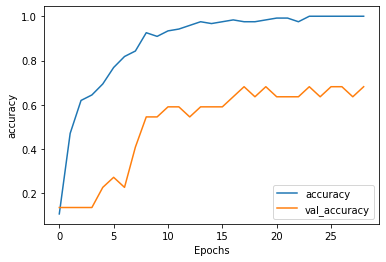

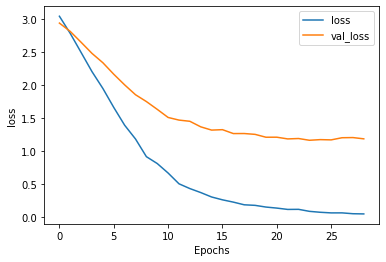

In [83]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [93]:
message = input("Enter message: ")
encoding = get_sentence_encoding(message,'hi').reshape(1,1,400)
result = ohe.inverse_transform(model(encoding))
result = le.inverse_transform(result)[0]
print(result)

Enter message: तुम्हारा नाम क्या हे?


नाम क्वेरी
